In [1]:
####################  Data Analysis & Calculation  #####################3
import numpy as np   
import pandas as pd  
import datetime  

####################  Visuvalization & plotting  #####################3
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  
#################### Machine Learning #####################3
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 

In [2]:
new = pd.read_csv(r"C:\Users\cheta\Desktop\python\Machine learning Practise Projects\Ensemble Technique\heart.csv")
new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [60]:
new.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

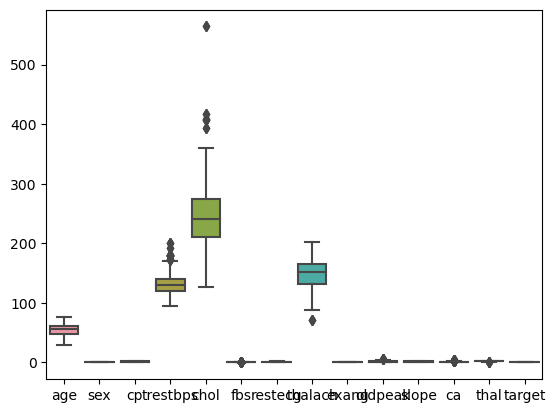

In [61]:
sns.boxplot(data=new)

In [62]:
for i in new:
    q1 = new[i].quantile(0.25)
    q3 = new[i].quantile(0.75)
    iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
    upper_limit = q3+1.5*iqr #acceptable range
    lower_limit = q1-1.5*iqr
    new[i]=np.where(new[i]>upper_limit,upper_limit,new[i])
    new[i]=np.where(new[i]<lower_limit,lower_limit,new[i])
    if type(i)==str:
        continue

<AxesSubplot:>

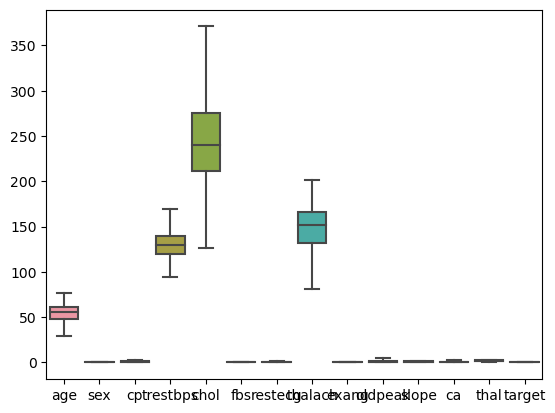

In [63]:
sns.boxplot(data=new)

# Data Partition-1

In [64]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
X = new.drop('target',axis=1)
y = new[["target"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [65]:
print('The number of samples into the Train data is {}.'.format(x_train.shape[0]))
print('The number of samples into the Test data is {}.'.format(x_test.shape[0]))

The number of samples into the Train data is 820.
The number of samples into the Test data is 205.


In [66]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
880,57.0,1.0,0.0,132.0,207.0,0.0,1.0,168.0,1.0,0.0,2.0,0.0,3.0
358,59.0,1.0,3.0,134.0,204.0,0.0,1.0,162.0,0.0,0.8,2.0,2.0,2.0
772,62.0,0.0,0.0,150.0,244.0,0.0,1.0,154.0,1.0,1.4,1.0,0.0,2.0
682,59.0,1.0,0.0,164.0,176.0,0.0,0.0,90.0,0.0,1.0,1.0,2.0,1.0
848,58.0,0.0,3.0,150.0,283.0,0.0,0.0,162.0,0.0,1.0,2.0,0.0,2.0


In [67]:
x_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

# Model 2 -GBM (Gradient boosting)

In [68]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [2,4,5], # number of tress
                    'max_depth':    [2,3],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'min_samples_leaf':[100,200,270], ## child
                    'min_samples_split':[50,70,80]} #parent 

In [69]:

# Gridsearch the parameters to find the best parameters.
model = GradientBoostingClassifier(random_state=10,loss="deviance",criterion="mse")
## random_state  -- The random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=5,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(criterion='mse',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [2, 3],
                         'min_samples_leaf': [100, 200, 270],
                         'min_samples_split': [50, 70, 80],
                         'n_estimators': [2, 4, 5]},
             scoring='accuracy', verbose=1)

In [70]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.8, 'max_depth': 3, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 5}


In [71]:
# Re-fit the model with the best parameters
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.8, min_samples_leaf=100,
                           min_samples_split=50, n_estimators=5)

In [72]:
# Prediction
train_pred = final_mod_GBM.predict(x_train)
test_pred = final_mod_GBM.predict(x_test)

In [73]:
train_pred

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0.

# Confusion Matrix Train Data (2 Model)

In [74]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       390
         1.0       0.89      0.91      0.90       430

    accuracy                           0.90       820
   macro avg       0.90      0.90      0.90       820
weighted avg       0.90      0.90      0.90       820



# Confusion Matrix Test Data (2 Model)

In [75]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       109
         1.0       0.85      0.90      0.87        96

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



# Importance Feature

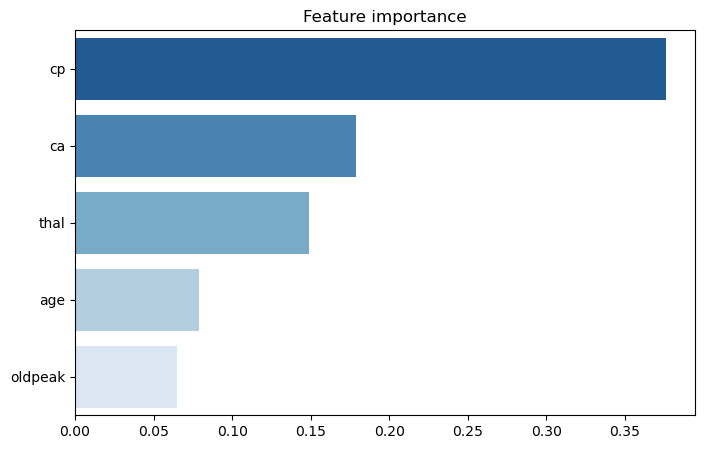

In [76]:
# Plot features importances
imp = pd.Series(data=final_mod_GBM.feature_importances_, index=final_mod_GBM.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')

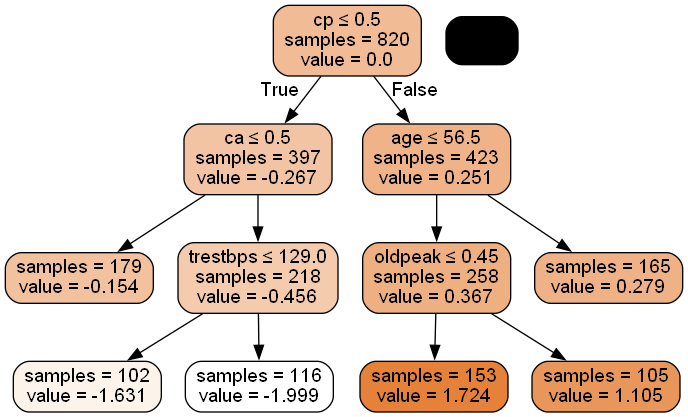

In [77]:
from sklearn.tree import export_graphviz
sub_tree = final_mod_GBM.estimators_[0, 0] #0 to 99  # Model ( Final_mod_GBM) = Give Tree
target=['1','0']
feature_list = list(X.columns)

# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(sub_tree,
    out_file=None,
    class_names=target,
    feature_names = feature_list, 
    filled=True, 
    rounded=True,
    special_characters=True,
    impurity=False)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

# Finished